# Wine Quality Prediction

 # 
 **The objective of this project is to develop a machine learning model that can predict the quality of wines based on various chemical and physical attributes. Instead of predicting an exact quality score, the model will categorize wines into predefined quality classes, providing a practical tool for winemakers and enthusiasts to quickly assess and understand the potential quality of a wine.**



   # Data Description-
    
* **fixed acidity** -  Higher levels might contribute to a more robust flavor.       
*    **volatile acidity** -   Too much can lead to unpleasant flavors, so lower levels are generally preferred.  
*   **citric acid** -  Adds freshness and can enhance the overall acidity, contributing positively to quality.       
*    **residual sugar** - Sweeter wines might be preferred by some, but it depends on personal taste.      
*   **chlorides** -   Lower levels are generally preferred as high chloride content can lead to a salty taste.          
*    **free sulfur dioxide** - Acts as a preservative; an appropriate amount is crucial for wine quality.


*    **total sulfur dioxide** - Should be monitored to avoid excess, as too much can affect taste and aroma negatively.


*   **density** - Can indicate the body of the wine, with higher density often associated with richer wines.           
*   **pH** -    Affects the acidity; balanced pH is usually desired for a harmonious taste.

               
*   **sulphates** - Can contribute to the wine's stability and preservation.       
*   **alcohol** -   Higher alcohol content might be preferred by some, but balance is key.            
*   **quality** -  This is the target variable, representing the overall quality or rating of the wine. 

# importing  all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [2]:
# Loading the dataset
wine = pd.read_csv(r"C:\Users\visha\Downloads\winequality-red final.csv")  # to read the csv file
print("Successfully Imported Data!")   # printing the data     
wine

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.53,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,67.0,?,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.54,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
print(wine.shape) # Number of Row and column will be printed

(1599, 12)


In [4]:
# Data information
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   object 
 8   pH                    1599 non-null   object 
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.0+ KB


# Description

In [5]:
wine.describe(include='all') # max , min , std , mean , count will return of all the column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599,1599,1599.000000,1599.000000,1599.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,90,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9976,3.3,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,57,NaN,NaN,NaN
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.890557,46.470919,NaN,NaN,0.657992,10.423483,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.458208,32.801732,NaN,NaN,0.169691,1.065187,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,NaN,NaN,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,NaN,NaN,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,NaN,NaN,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.500000,63.000000,NaN,NaN,0.730000,11.100000,6.000000


# Finding Null Values

In [6]:
wine.isnull().sum() # to find the null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine[wine["quality"]=="NaN"] #  to filter rows where the "quality" column has a value of "NaN" (Not a Number).

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
wine['pH'] = pd.to_numeric(wine['pH'], errors='coerce')

In [9]:
column_name = 'pH'
mean_value = wine[column_name].mean()

In [10]:
nl_mean=wine['pH'].mean()

#  to replace the value with mean value 
wine['pH']=wine['pH'].fillna(nl_mean)

In [11]:
wine['pH'].isnull().sum()

0

In [12]:
wine['density'] = pd.to_numeric(wine['density'], errors='coerce')

In [13]:
column_name = 'density'
mean_value = wine[column_name].mean()

In [14]:
nl_mean=wine['density'].mean()

#  to replace the value with mean value 
wine['density']=wine['density'].fillna(nl_mean)

In [15]:
wine['density'].isnull().sum()

0

In [16]:
mean_value = wine['quality'].mean()
wine['quality'] = wine['quality'].fillna(mean_value)

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.53,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,67.0,0.996742,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.54,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.994900,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995120,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.995740,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470,3.57,0.71,10.2,5


In [17]:
wine['quality'].replace("NaN",np.nan,inplace=True)


In [18]:
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.53,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,67.0,0.996742,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.54,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.994900,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995120,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.995740,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470,3.57,0.71,10.2,5


In [19]:
import pandas as pd

# Assuming your DataFrame is named df
replacement_value = 0  # Replace NaN with 0, change this value to your desired replacement

# Replace all NaN values in the entire DataFrame with the specified value
wine=wine.fillna(replacement_value)

# Display the modified DataFrame
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.53,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,67.0,0.996742,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.54,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.994900,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995120,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.995740,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470,3.57,0.71,10.2,5


In [20]:
wine.corr()  # This is a pandas DataFrame method used to calculate the correlation between columns in a DataFrame. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.154799,-0.114735,0.668060,-0.682143,0.182182,-0.061843,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010715,0.084527,0.022657,0.230418,-0.259534,-0.202748,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.061184,0.029816,0.364634,-0.539645,0.313797,0.110270,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.186516,0.203255,0.350627,-0.085945,0.005923,0.042065,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005176,0.046767,0.201504,-0.264811,0.371809,-0.219345,-0.128907
free sulfur dioxide,-0.154799,-0.010715,-0.061184,0.186516,0.005176,1.000000,0.661971,-0.024471,0.072042,0.054312,-0.071025,-0.051621
total sulfur dioxide,-0.114735,0.084527,0.029816,0.203255,0.046767,0.661971,1.000000,0.069339,-0.056425,0.039436,-0.204127,-0.184546
density,0.668060,0.022657,0.364634,0.350627,0.201504,-0.024471,0.069339,1.000000,-0.342463,0.147433,-0.495435,-0.176025
pH,-0.682143,0.230418,-0.539645,-0.085945,-0.264811,0.072042,-0.056425,-0.342463,1.000000,-0.182151,0.206216,-0.055176
sulphates,0.182182,-0.259534,0.313797,0.005923,0.371809,0.054312,0.039436,0.147433,-0.182151,1.000000,0.094278,0.251805


# Data Analysis

## Countplot:

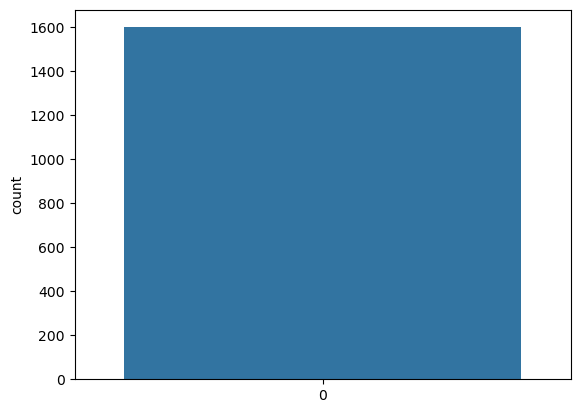

In [21]:
sns.countplot(wine['quality'])
plt.show()    

 #  
 **This line of code is using Seaborn to create a countplot. In this case, it's plotting the counts of each unique value in the 'pH' column of the 'wine' DataFrame. The x-axis represents the different pH values, and the height of each bar indicates the count of occurrences of each pH value in the dataset.**

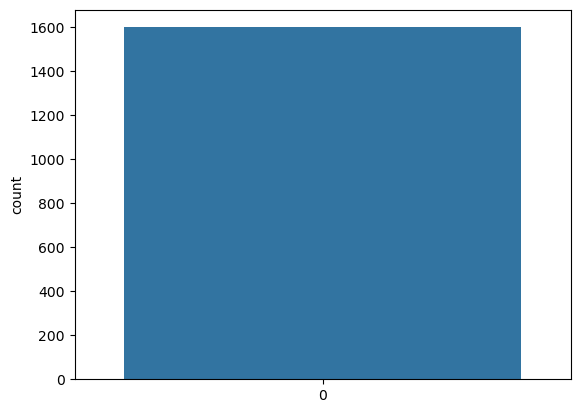

In [22]:
sns.countplot(wine['pH'])
plt.show()

#
**This line of code is using Seaborn to create a countplot. In this case, it's plotting the counts of each unique value in the 'alcohol' column of the 'wine' DataFrame. The x-axis represents different alcohol content values, and the height of each bar indicates the count of occurrences of each alcohol content value in the dataset.**

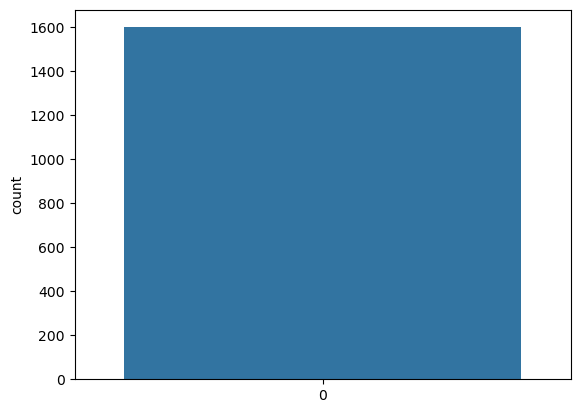

In [23]:
sns.countplot(wine['alcohol'])
plt.show()

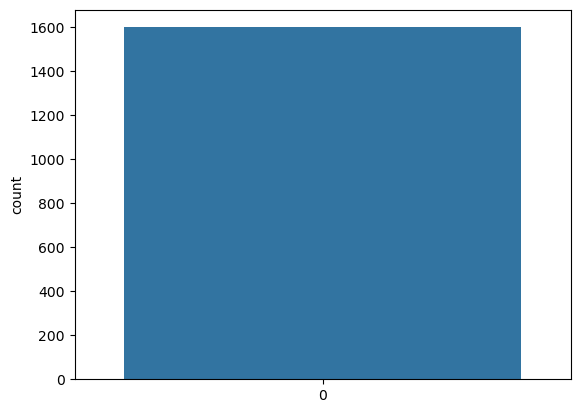

In [24]:
sns.countplot(wine['fixed acidity'])
plt.show()

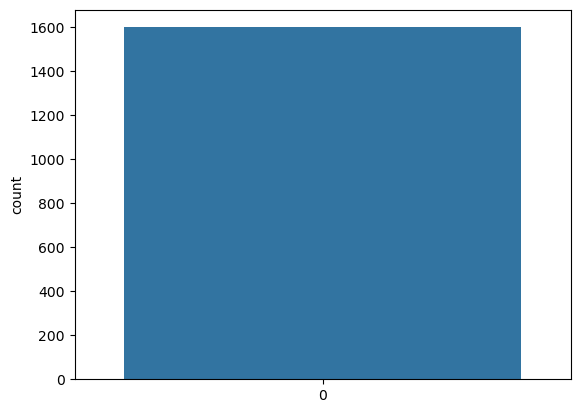

In [25]:
sns.countplot(wine['volatile acidity'])
plt.show()

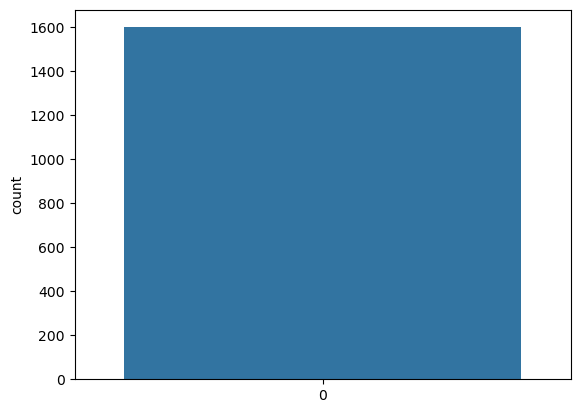

In [26]:
sns.countplot(wine['citric acid'])
plt.show()

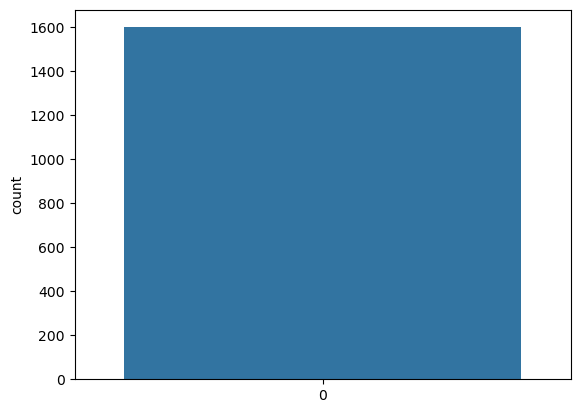

In [27]:
sns.countplot(wine['density'])
plt.show()

## KDE plot:

<Axes: xlabel='quality', ylabel='Density'>

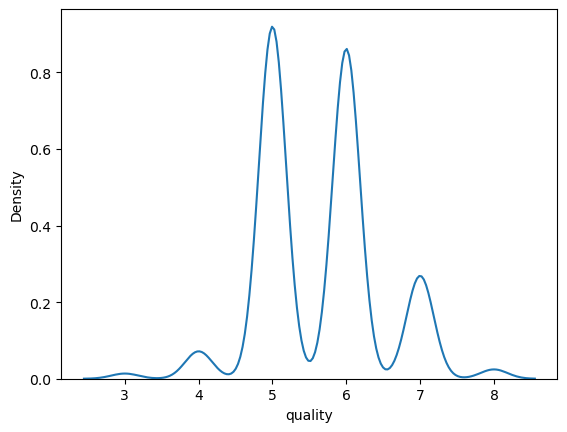

In [28]:
sns.kdeplot(wine.query('quality > 2').quality)

## Distplot:

<Axes: xlabel='alcohol', ylabel='Density'>

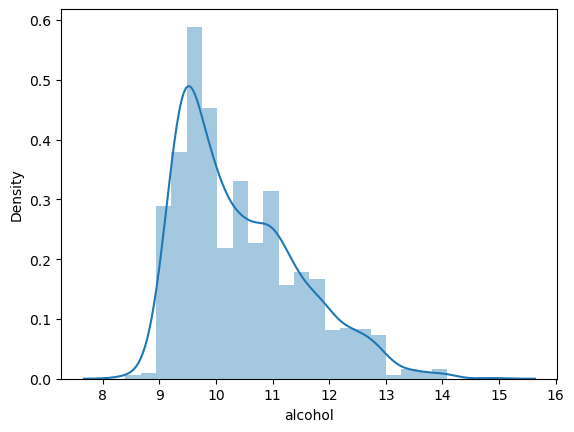

In [29]:
sns.distplot(wine['alcohol'])

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

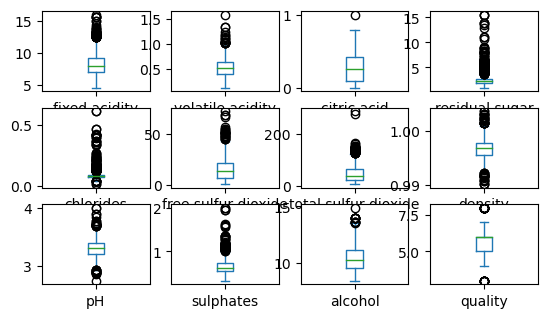

In [30]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

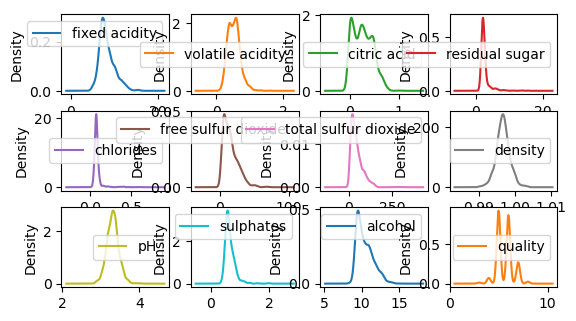

In [31]:
wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

## Histogram

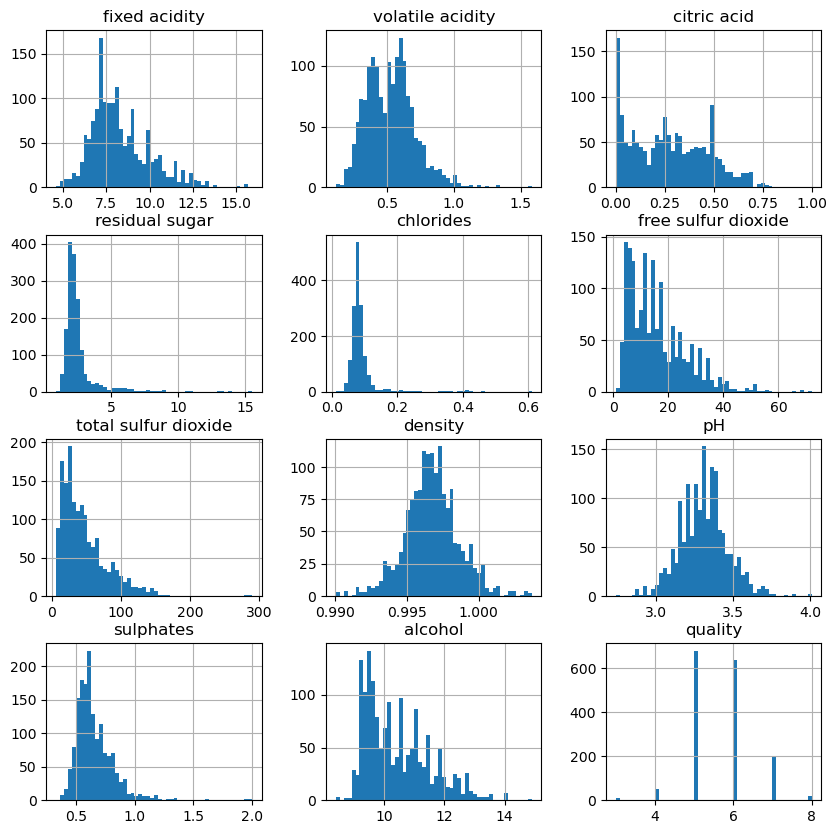

In [32]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

<Axes: >

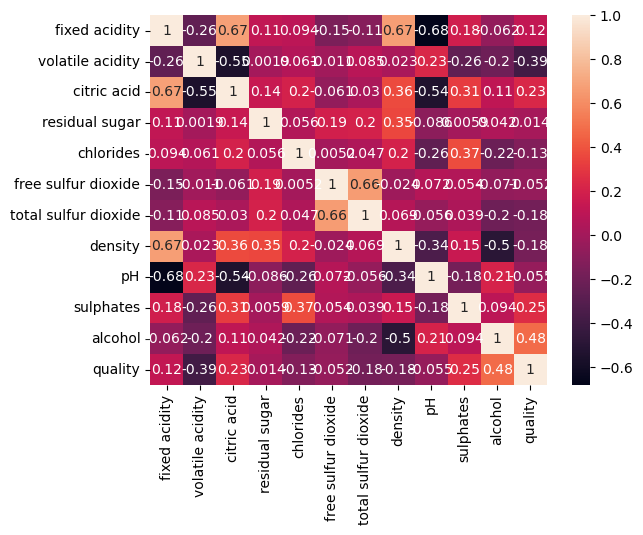

In [33]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

## Pair Plot:

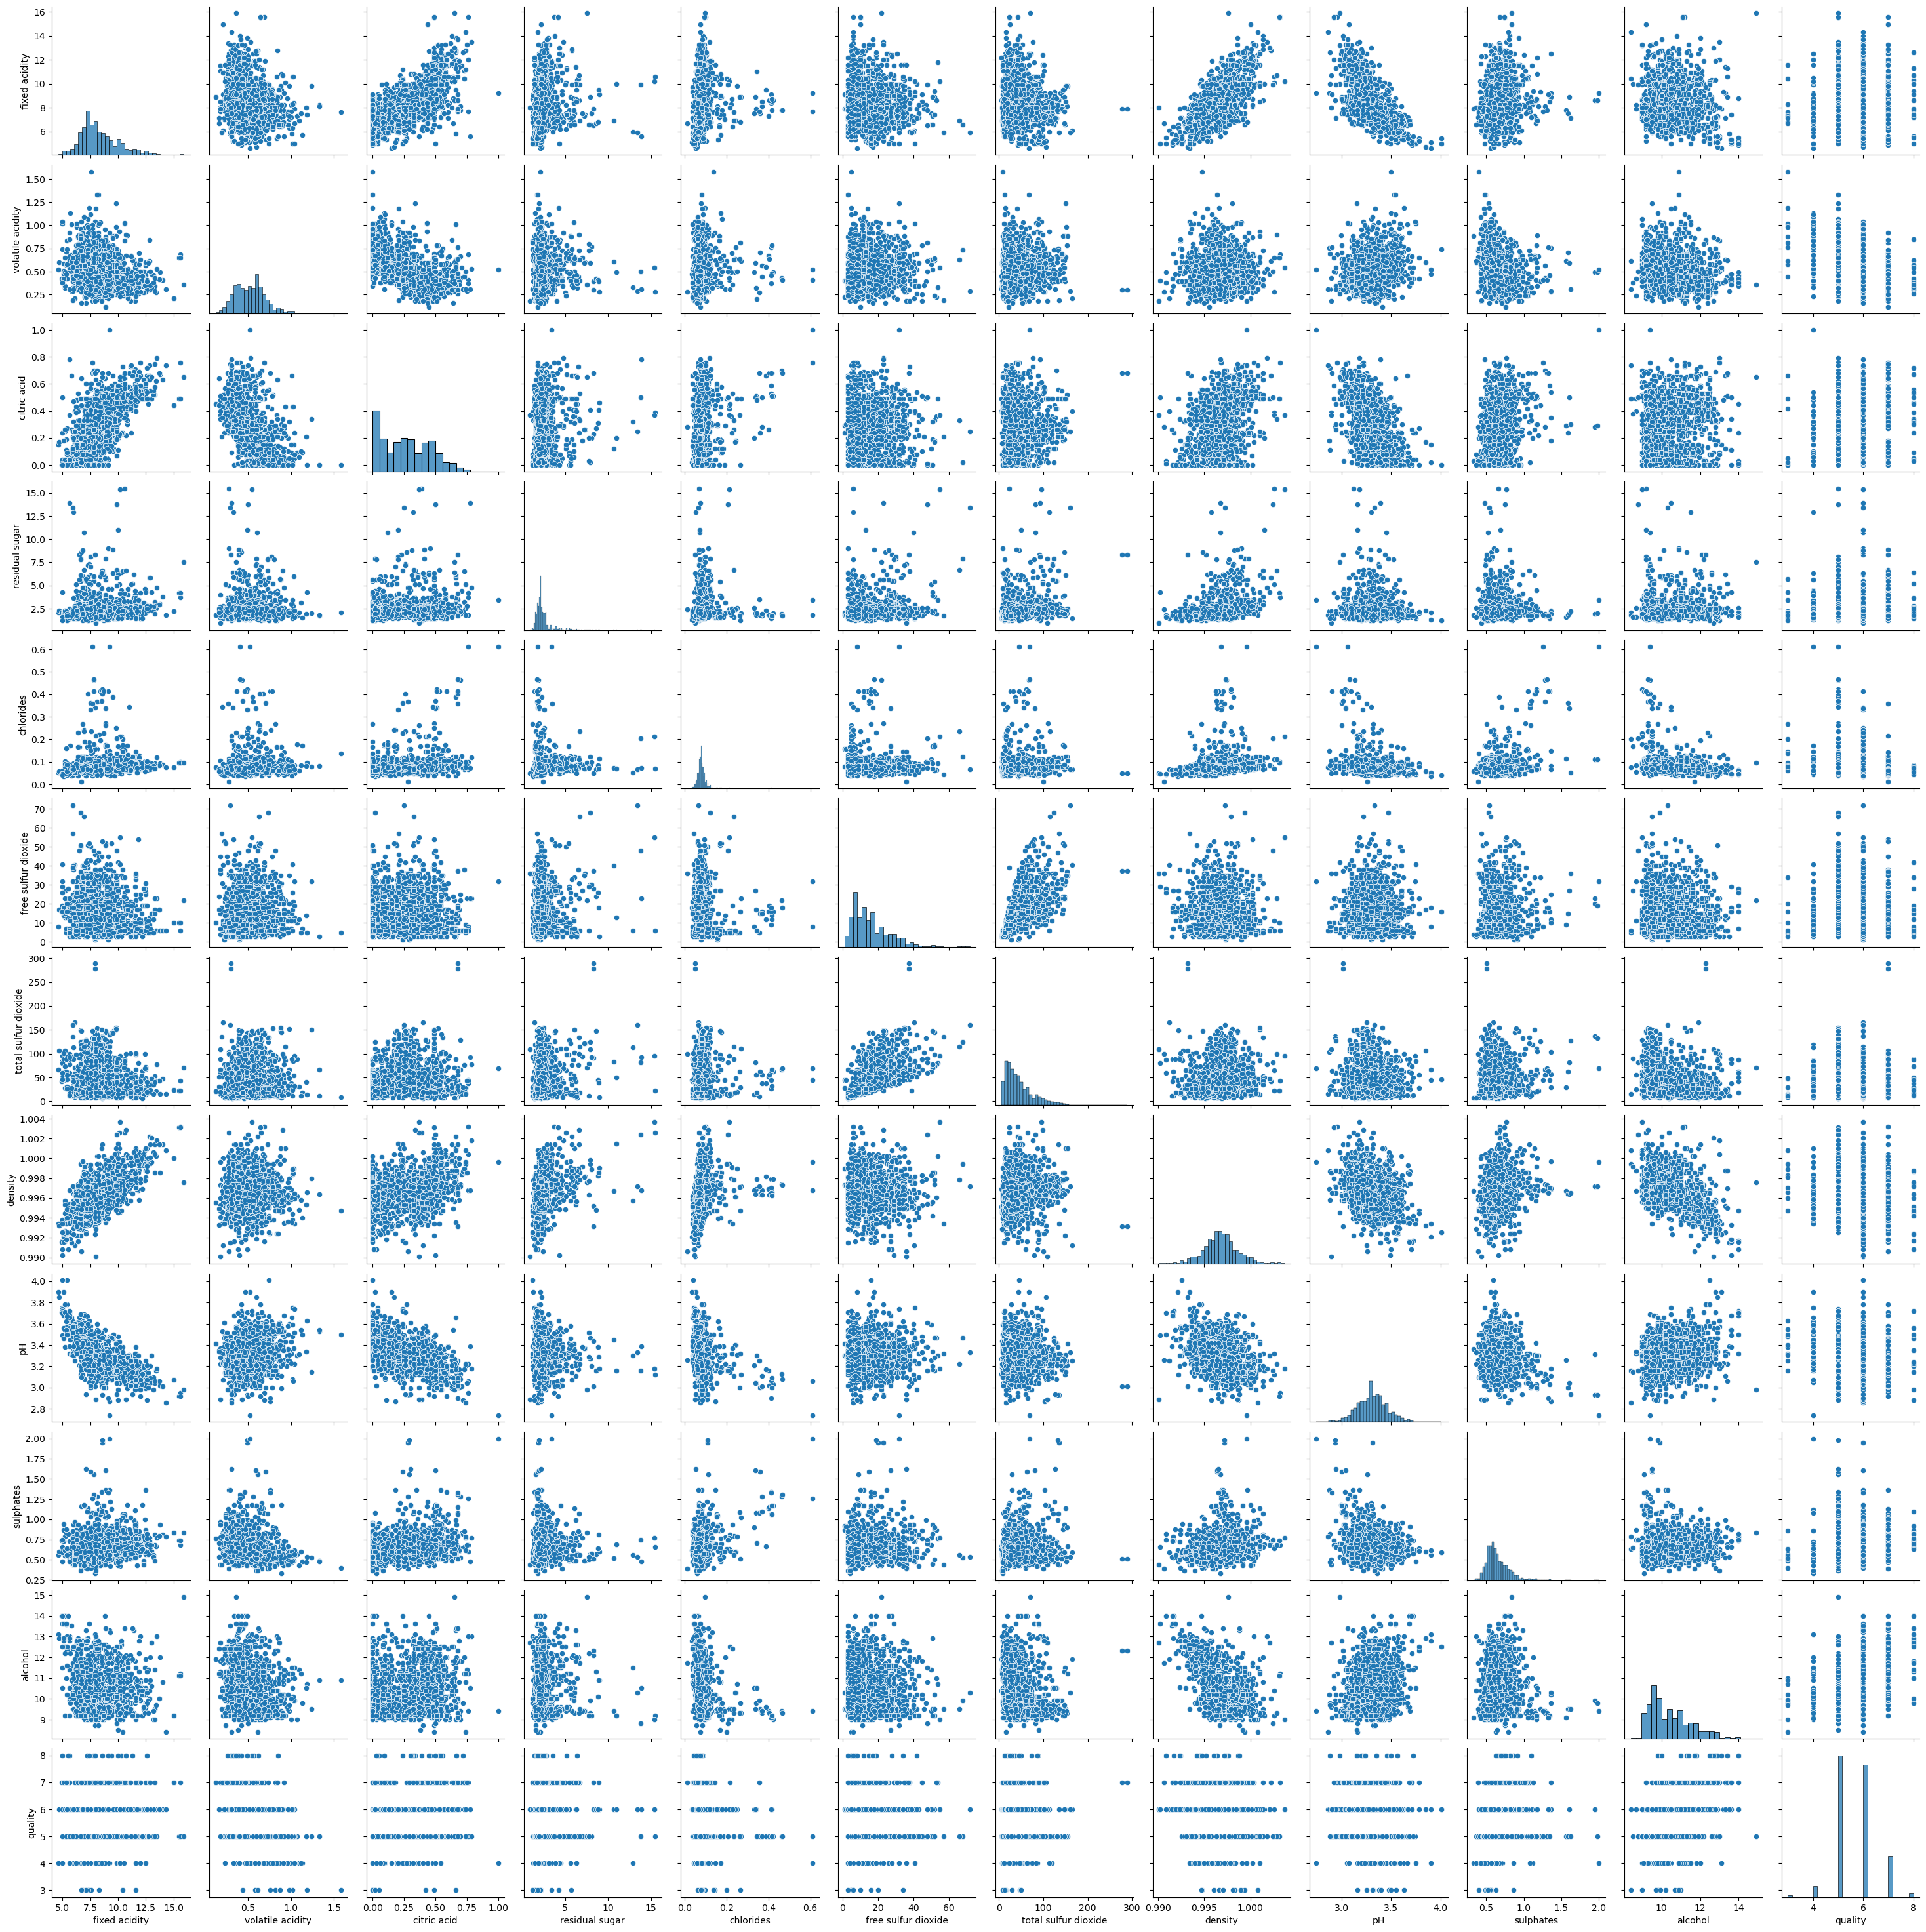

In [34]:
sns.pairplot(wine)

## Violinplot:

<Axes: xlabel='quality', ylabel='alcohol'>

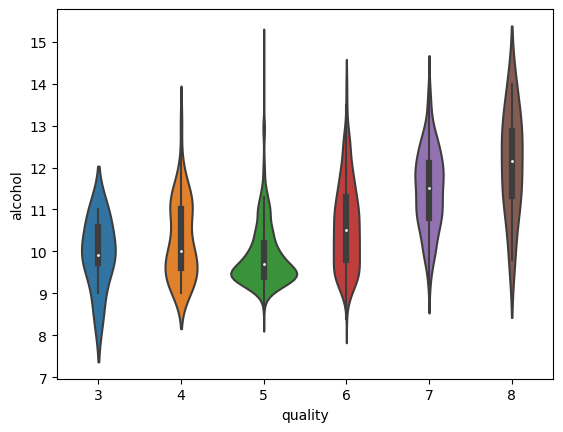

In [35]:
sns.violinplot(x='quality', y='alcohol', data=wine)

# Feature Selection

In [36]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [37]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [38]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.996800,3.20,0.53,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,67.0,0.996742,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998000,3.16,0.54,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.997800,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.994900,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995120,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.995740,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470,3.57,0.71,10.2


In [39]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07661934 0.10445844 0.09584959 0.07309629 0.06839953 0.06956955
 0.08264261 0.08919343 0.06590098 0.10516656 0.16910368]


# Splitting Dataset

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# LogisticRegression:

In [42]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.875


# Using KNN:

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)
y_pred =knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8729166666666667


# Using SVC:

In [44]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,Y_train)
pred_y = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.86875


# Using Decision Tree:

In [45]:
from sklearn.tree import DecisionTreeClassifier
Dec_model = DecisionTreeClassifier(criterion='entropy',random_state=7)
Dec_model.fit(X_train,Y_train)
y_pred =Dec_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8625


# Using Random Forest:

In [46]:
from sklearn.ensemble import RandomForestClassifier
Ran_model = RandomForestClassifier(random_state=1)
Ran_model.fit(X_train, Y_train)
y_pred2 = Ran_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.89375


In [47]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree','Random Forest'],
    'Score': [0.870,0.872,0.868,0.864,0.893]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.893,Random Forest
0.872,KNN
0.870,Logistic Regression
0.868,SVC
0.864,Decision Tree


In [48]:
#Hence I will use Random Forest algorithms for training my model.

# gridsearch using random forest

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid=param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
gs = GridSearchCV(estimator=Ran_model , param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [52]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
best_rf_model =gs.best_estimator_

In [54]:
Y_pred=best_rf_model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , Y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.89375


In [56]:
Y_pred=Ran_model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
Ran_model.predict([[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]]) 
#due to this condition I have use row number 7 values which indicate better qyalityu which is above six so it is givening output 1
# and when we take the row 0 it give output 0 because the quality is less than 5 

array([1], dtype=int64)

# Gridsearch using logisticregression

In [58]:
param_grid = {
   'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [59]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


#estimator:This is the machine learning model for which you want to perform hyperparameter tuning. In your case, 
#It's referred to as logreg, which suggests it's a logistic regression model. 

#

In [60]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [61]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.8784633247918002


In [62]:
best_logreg_model = grid_search.best_estimator_
Y_pred = best_logreg_model.predict(X_test)

In [63]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8729166666666667


In [64]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid]

In [65]:
from sklearn.model_selection import StratifiedKFold
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8811454311454312
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.9079713642213644
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8793758043758043


# Model Comparison and Conclusions

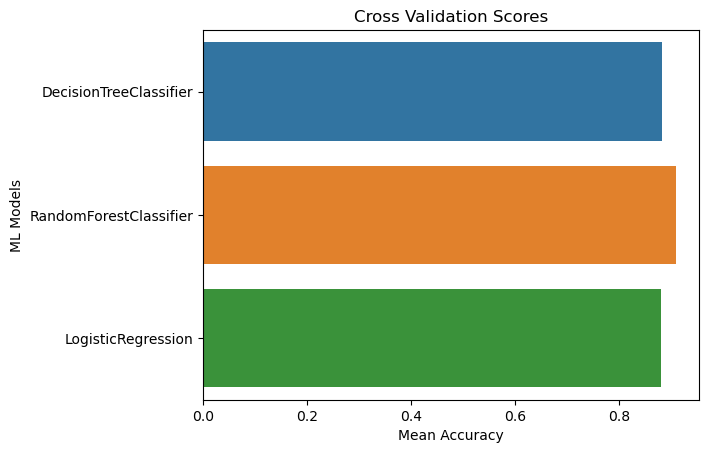

In [66]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.8811454311454312, 0.9079713642213644,0.8802686615186616],
    "ML Models": ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression"]})
# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
# Show the plot
plt.show()